<a href="https://colab.research.google.com/github/tuenv193176/Project3/blob/main/ProjectIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
# Tải dữ liệu từ tệp CSV
dataset = pd.read_csv('/content/rawdata.csv')

# Hàm để trích xuất giá trị 'lp' và 'wp' từ tên cột
def extract_lp_wp(column_name):
    match = re.search(r"lp='(\d+\.?\d*)mm' wp='(\d+\.?\d*)mm'", column_name)
    if match:
        return float(match.group(1)), float(match.group(2))
    return None


In [4]:
# Chuẩn bị dữ liệu đầu vào và đầu ra
input_data = dataset.iloc[:, 1:].T
input_data.columns = dataset['Freq [GHz]']
output_data = [extract_lp_wp(col) for col in dataset.columns[1:]]
output_data = np.array([list(i) for i in output_data if i is not None])

# Chia dữ liệu thành tập đào tạo và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu đầu vào
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Chuyển đổi sang tensors của PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Tạo DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

In [ ]:
input_data_sample = input_data[:5]  # Lấy 5 mẫu đầu tiên
input_data_sample

Freq [GHz],2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,...,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0
"dB(S(1,1)) [] - lp='20mm' wp='30mm'",-0.718975,-0.717056,-0.705753,-0.689226,-0.670279,-0.650838,-0.632544,-0.617475,-0.609313,-0.616434,...,-0.888989,-1.903620,-1.016751,-0.743980,-0.718570,-0.753090,-0.816706,-0.903687,-1.017378,-1.168656
"dB(S(1,1)) [] - lp='20mm' wp='30.25mm'",-0.727161,-0.720977,-0.709381,-0.692911,-0.672958,-0.651544,-0.631158,-0.614763,-0.606378,-0.613740,...,-0.893576,-1.551701,-0.839057,-0.713192,-0.717279,-0.761979,-0.833263,-0.930180,-1.056461,-1.220792
"dB(S(1,1)) [] - lp='20mm' wp='30.5mm'",-0.707616,-0.682726,-0.653128,-0.623606,-0.597851,-0.578786,-0.569626,-0.576315,-0.614629,-0.740067,...,-4.044286,-1.818257,-0.984172,-0.857661,-0.881822,-0.962395,-1.073001,-1.218415,-1.450133,-1.885325
"dB(S(1,1)) [] - lp='20mm' wp='30.75mm'",-0.726102,-0.724409,-0.716535,-0.702518,-0.683441,-0.661193,-0.638179,-0.617084,-0.600864,-0.593398,...,-0.655492,-0.918738,-1.238618,-0.765545,-0.704284,-0.731283,-0.795422,-0.889517,-1.016376,-1.187123
"dB(S(1,1)) [] - lp='20mm' wp='31mm'",-0.723406,-0.720180,-0.713513,-0.701092,-0.682798,-0.660446,-0.637217,-0.616888,-0.603084,-0.599108,...,-0.665559,-0.997142,-1.170709,-0.760040,-0.714457,-0.761342,-0.839802,-0.935520,-1.063849,-1.261506


In [ ]:
input_data.columns

Float64Index([2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2,
              3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0],
             dtype='float64', name='Freq [GHz]')

In [ ]:
output_data

array([[20.  , 30.  ],
       [20.  , 30.25],
       [20.  , 30.5 ],
       ...,
       [30.  , 39.5 ],
       [30.  , 39.75],
       [30.  , 40.  ]])

In [5]:
# Xây dựng mô hình mạng nơ-ron
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(21, 64)  # 21 đầu vào, 64 nơ-ron ở lớp ẩn đầu tiên
        self.fc2 = nn.Linear(64, 128)  # Lớp ẩn thứ hai
        self.fc3 = nn.Linear(128, 2)   # 2 đầu ra

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

In [ ]:
model

Net(
  (fc1): Linear(in_features=21, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
)

In [36]:
# Khởi tạo mô hình và bộ tối ưu hóa
optimizer = optim.Adam(model.parameters(), lr=0.002)
criterion = nn.MSELoss()

In [37]:
# Đào tạo mô hình
num_epochs = 200
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')


Epoch [1/200], Loss: 0.021386802196502686
Epoch [11/200], Loss: 0.05496233329176903
Epoch [21/200], Loss: 0.04764522612094879
Epoch [31/200], Loss: 0.12539784610271454
Epoch [41/200], Loss: 0.10839954763650894
Epoch [51/200], Loss: 0.04634778946638107
Epoch [61/200], Loss: 0.4936700761318207
Epoch [71/200], Loss: 0.0030180944595485926
Epoch [81/200], Loss: 0.18833887577056885
Epoch [91/200], Loss: 0.07944366335868835
Epoch [101/200], Loss: 0.06299304217100143
Epoch [111/200], Loss: 0.02533411793410778
Epoch [121/200], Loss: 0.07531698793172836
Epoch [131/200], Loss: 0.07278726994991302
Epoch [141/200], Loss: 0.024243272840976715
Epoch [151/200], Loss: 0.07106650620698929
Epoch [161/200], Loss: 0.03376195952296257
Epoch [171/200], Loss: 0.0540960319340229
Epoch [181/200], Loss: 0.03361409902572632
Epoch [191/200], Loss: 0.05439947918057442


In [38]:
# Đánh giá mô hình
model.eval()
with torch.no_grad():
    predicted = model(X_test_tensor)
    test_loss = criterion(predicted, y_test_tensor)
    print(f'Test Loss (MSE): {test_loss.item()}')

Test Loss (MSE): 0.07642518728971481


In [40]:
# Chọn cột đầu tiên sau cột tần số để làm mẫu đầu vào
sample_input_column = dataset.iloc[:, 1]

# Chuyển đổi sang dạng mảng numpy và reshape để có kích thước phù hợp với mô hình
sample_input = sample_input_column.values.reshape(1, -1)

# Chuẩn hóa dữ liệu đầu vào
sample_input_scaled = scaler.transform(sample_input)

# Chuyển đổi thành tensor của PyTorch và thực hiện dự đoán
sample_input_tensor = torch.tensor(sample_input_scaled, dtype=torch.float32)
with torch.no_grad():
    predicted_output = model(sample_input_tensor)
    print("Dự đoán lp và wp:", predicted_output.numpy())


Dự đoán lp và wp: [[20.314148 30.595493]]


In [42]:
# Lấy dữ liệu S11 của anten microstrip 2.4, freq =[2:4:0.1], wp = 38, lp = 29.4, fast sweep
sample_input = [-0.816939424, -0.995458087, -1.42383824, -3.105021488, -17.25113276, -3.209035676, -1.435305521, -1.008429243, -0.844779562, -0.764374014, -0.721526017, -0.704090271, -0.713973369, -0.766698236, -0.906894503, -1.274070172, -2.443538484, -8.228818754, -9.431100656, -2.936763508, -1.658649054]

# Chuyển đổi sample_input thành mảng 2 chiều
sample_input_2d = np.array(sample_input).reshape(1, -1)

# Chuẩn hóa dữ liệu đầu vào
sample_input_scaled = scaler.transform(sample_input_2d)

# Chuyển đổi thành tensor của PyTorch và thực hiện dự đoán
sample_input_tensor = torch.tensor(sample_input_scaled, dtype=torch.float32)
with torch.no_grad():
    predicted_output = model(sample_input_tensor)
    print("Dự đoán lp và wp:", predicted_output.numpy())


Dự đoán lp và wp: [[29.481127 37.766567]]


In [43]:
# Lấy dữ liệu S11 của anten microstrip 2.4, freq =[2:4:0.1], lp = 27.1, wp = 36.2, fast sweep
sample_input = [-0.72202, -0.77872, -0.86306, -1.02723, -1.47732, -3.57675, -10.714, -2.35412, -1.21591, -0.90394, -0.77637, -0.71535, -0.69072, -0.69707, -0.74246, -0.85298, -1.09815, -1.69067, -3.47952, -11.8626, -8.47031]

# Chuyển đổi sample_input thành mảng 2 chiều
sample_input_2d = np.array(sample_input).reshape(1, -1)

# Chuẩn hóa dữ liệu đầu vào
sample_input_scaled = scaler.transform(sample_input_2d)

# Chuyển đổi thành tensor của PyTorch và thực hiện dự đoán
sample_input_tensor = torch.tensor(sample_input_scaled, dtype=torch.float32)
with torch.no_grad():
    predicted_output = model(sample_input_tensor)
    print("Dự đoán lp và wp:", predicted_output.numpy())


Dự đoán lp và wp: [[27.110249 36.240993]]


Mô phỏng số liệu dự đoán và lý thuyết bằng HFSS

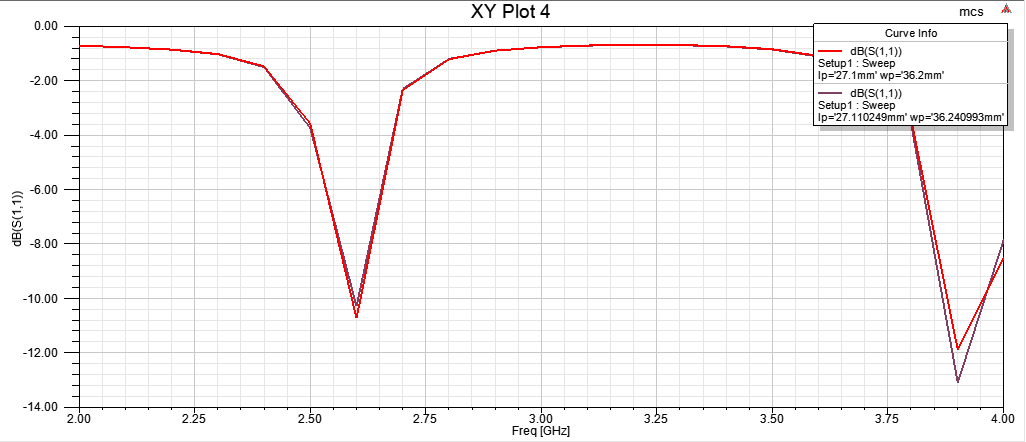